In [1]:
# Import necessary libraries
import pandas as pd  # For data handling and manipulation
from sklearn.datasets import load_iris  # To load the Iris dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.svm import SVC  # Support Vector Classifier (SVM model)

In [2]:
# Load the Iris dataset
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# Convert dataset to a Pandas DataFrame for easy manipulation
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Add the target column (class labels: 0, 1, 2)
df['target'] = iris.target

# Map target values to actual flower names (e.g., 0 → setosa)
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [5]:
df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [6]:
df.flower_name

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: flower_name, Length: 150, dtype: object

In [7]:
# Split the dataset into 3 parts based on flower class (manual slicing)
df0, df1, df2 = df[:50], df[50:100], df[100:]
# df0 = setosa, df1 = versicolor, df2 = virginica

In [8]:
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [9]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


In [10]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica
107,7.3,2.9,6.3,1.8,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica
109,7.2,3.6,6.1,2.5,2,virginica


In [11]:
# Function to plot any 2 dimensions for two flower types
def plot_dimensions(x, y, xlabel, ylabel, title):
    plt.title(f"By ML Students\n{title}")  # Title with name
    plt.xlabel(xlabel)  # X-axis label
    plt.ylabel(ylabel)  # Y-axis label
    
    # Plot Setosa data points in red with '+' marker
    plt.scatter(df0[x], df0[y], color="red", marker='+', label="Setosa")
    
    # Plot Versicolor data points in blue with '.' marker
    plt.scatter(df1[x], df1[y], color="blue", marker='.', label="Versicolor")
    
    plt.legend()  # Show legend
    plt.show()  # Display plot


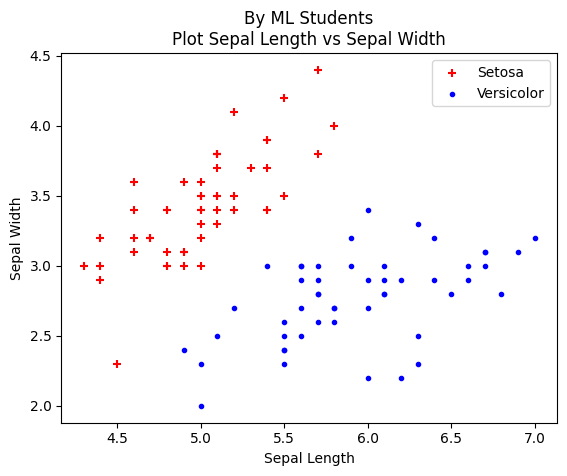

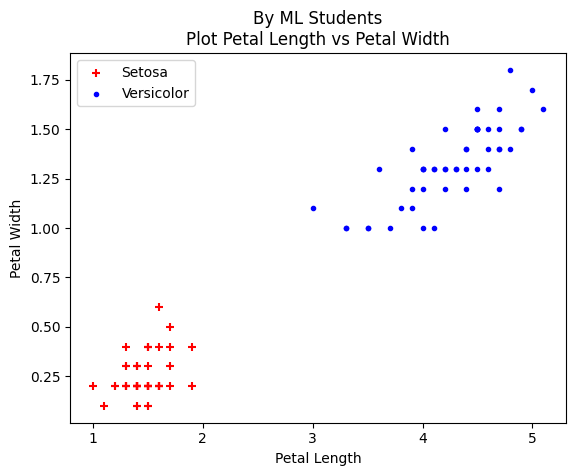

In [12]:
# Plot Sepal dimensions for Setosa and Versicolor
plot_dimensions('sepal length (cm)', 'sepal width (cm)', 
                'Sepal Length', 'Sepal Width', 
                "Plot Sepal Length vs Sepal Width")

# Plot Petal dimensions for Setosa and Versicolor
plot_dimensions('petal length (cm)', 'petal width (cm)', 
                'Petal Length', 'Petal Width', 
                "Plot Petal Length vs Petal Width")

In [13]:
# Prepare features and target variable
# Drop 'target' and 'flower_name' columns to keep only numeric features
X = df.drop(['target', 'flower_name'], axis='columns')

# Target labels (0, 1, 2 corresponding to the three flower classes)
y = df['target']

In [14]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [16]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Create a dictionary of SVM models with different parameters to compare their behavior
models = {
    'default': SVC(),                  # Default SVM with RBF kernel
    'C=1': SVC(C=1),                   # Regularization parameter C = 1
    'C=10': SVC(C=10),                 # Regularization parameter C = 10 (less tolerant to misclassification)
    'gamma=10': SVC(gamma=10),        # Set gamma = 10 (controls influence of each training point)
    'linear': SVC(kernel='linear')    # Use linear kernel instead of RBF
}

In [18]:
# Train all models using the same training data
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model to training data

In [19]:
# Make a prediction using the default SVM model
# Predict flower class for given input features: [sepal length, sepal width, petal length, petal width]
prediction = models['default'].predict([[4.8, 3.0, 1.5, 0.3]])

# Print predicted flower name using the target name mapping
print(f"Prediction for input [4.8, 3.0, 1.5, 0.3]: {iris.target_names[prediction[0]]}")

Prediction for input [4.8, 3.0, 1.5, 0.3]: setosa


C:\Users\nisha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
# SVM usign iris dataset with GUI--> for students

import tkinter as tk
from tkinter import messagebox
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load Iris data and train SVM model
iris = load_iris()
X, y = iris.data, iris.target
model = SVC()
model.fit(X, y)

# GUI prediction function
def predict():
    try:
        sl = float(entry1.get())
        sw = float(entry2.get())
        pl = float(entry3.get())
        pw = float(entry4.get())

        # Predict using trained model
        prediction = model.predict([[sl, sw, pl, pw]])[0]
        flower = iris.target_names[prediction]

        # Show result
        messagebox.showinfo("Prediction Result", f"Predicted Flower: {flower.capitalize()}")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Create main window
root = tk.Tk()
root.title("Iris Flower Predictor")
root.geometry("350x250")

# Input fields
tk.Label(root, text="Sepal Length (cm):").grid(row=0, column=0, padx=10, pady=5, sticky='e')
entry1 = tk.Entry(root)
entry1.grid(row=0, column=1)

tk.Label(root, text="Sepal Width (cm):").grid(row=1, column=0, padx=10, pady=5, sticky='e')
entry2 = tk.Entry(root)
entry2.grid(row=1, column=1)

tk.Label(root, text="Petal Length (cm):").grid(row=2, column=0, padx=10, pady=5, sticky='e')
entry3 = tk.Entry(root)
entry3.grid(row=2, column=1)

tk.Label(root, text="Petal Width (cm):").grid(row=3, column=0, padx=10, pady=5, sticky='e')
entry4 = tk.Entry(root)
entry4.grid(row=3, column=1)

# Predict button
tk.Button(root, text="Predict", command=predict, bg='green', fg='white').grid(row=4, column=0, columnspan=2, pady=20)

# Start GUI loop
root.mainloop()

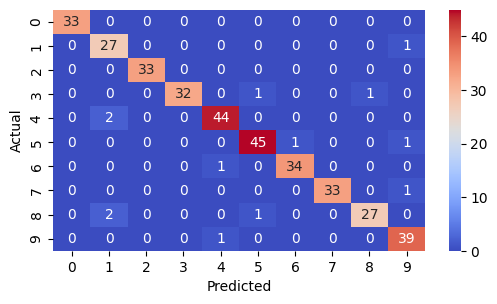

In [25]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def train_model():
    try:
        digits = load_digits()
        X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
        model = RandomForestClassifier(n_estimators=int(n_estimators_entry.get()))
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        accuracy_lbl.config(text=f"Accuracy: {accuracy:.2f}")
        cm = confusion_matrix(y_test, model.predict(X_test))
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
        plt.xlabel("Predicted"), plt.ylabel("Actual")
        for widget in canvas_frame.winfo_children():
            widget.destroy()
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()
    except Exception as e:
        messagebox.showerror("Error", str(e))

app = tk.Tk()
app.title("Random Forest Classifier - Nishad 221P045")
app.config(bg="#f0f0f0")

tk.Label(app, text="Number of Estimators:", bg="#f0f0f0").pack(pady=10)
n_estimators_entry = tk.Entry(app)
n_estimators_entry.insert(0, "20")
n_estimators_entry.pack(pady=5)

train_btn = tk.Button(app, text="Train Model", command=train_model, bg="#4CAF50", fg="white")
train_btn.pack(pady=15)

accuracy_lbl = tk.Label(app, text="Accuracy: N/A", bg="#f0f0f0")
accuracy_lbl.pack(pady=10)

canvas_frame = tk.Frame(app, bg="#f0f0f0")
canvas_frame.pack(pady=15)

app.mainloop()

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Select fewer features correctly
X = df[['age', 'bmi', 'bp', 's5']]  # 'bp' is blood pressure and 's5' is a selected feature
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model once
model = LinearRegression()
model.fit(X_train, y_train)

# Create the GUI window
window = tk.Tk()
window.title("Diabetes Progression Prediction")
window.geometry("400x400")

# Create input fields for selected features
labels = {
    'age': "Age (years)",
    'bmi': "Body Mass Index (BMI)",
    'bp': "Blood Pressure (mm Hg)",
    's5': "S5 Measurement"
}

entries = []
for i, (key, label_text) in enumerate(labels.items()):
    label = ttk.Label(window, text=label_text + ":")
    label.grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Create a button to predict
def predict():
    try:
        # Get input values
        input_values = [float(entry.get()) for entry in entries]
        # Make prediction
        prediction = model.predict([input_values])[0]
        # Display prediction
        result_label.config(text="Disease Progression: {:.2f}".format(prediction))
    except ValueError:
        messagebox.showerror("Input Error", "Invalid input. Please enter valid numbers for all features.")
    except Exception as e:
        messagebox.showerror("Prediction Error", f"An error occurred: {str(e)}")

# Create a button to predict
predict_button = ttk.Button(window, text="Predict", command=predict)
predict_button.grid(row=len(labels), column=0, columnspan=2, padx=5, pady=10)

# Create a label to display the prediction
result_label = ttk.Label(window, text="")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, padx=5, pady=5)

# Create a reset button to clear inputs
def reset():
    for entry in entries:
        entry.delete(0, tk.END)
    result_label.config(text="")

reset_button = ttk.Button(window, text="Reset", command=reset)
reset_button.grid(row=len(labels) + 2, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()


C:\Users\nisha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
